
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Data Wrangling


In [5]:


tsDataWrangling_obj.read_data( 'input/RNN_time_DELAYS_2000_PerCast_rcalix.csv' ) 
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS[tsDataWrangling_obj.l_new]

tsDataWrangling_obj.read_df_Dates_Map('input/RC_CNUM_RNN_time_DELAYS_2000_PerCast_rcalix.csv')
tsDataWrangling_obj.df_Dates_Map = tsDataWrangling_obj.df_Dates_Map[ tsDataWrangling_obj.l_map_dates ]

print( tsDataWrangling_obj.for_RNN_data_CIVS.shape   )
print( tsDataWrangling_obj.df_Dates_Map.shape        )       ## dates and cnum additionally included 

tsDataWrangling_obj.delta_for_RNN_data_CIVS      = tsDataWrangling_obj.for_RNN_data_CIVS.copy()
tsDataWrangling_obj.SI_lookup_for_RNN_data_CIVS  = tsDataWrangling_obj.for_RNN_data_CIVS.copy()

tsDataWrangling_obj.calculateDeltas()
tsDataWrangling_obj.delta_for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS[ tsDataWrangling_obj.l_delta ]
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS

tsDataWrangling_obj.calculateMovingAverage()
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n  = int( tsGPT_obj.for_RNN_data_CIVS.shape[0] )



(1383, 25)
(1383, 27)


In [6]:

## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.cols_list_DF
## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.df_Dates_Map
## tsDataWrangling_obj.data_plot_all_columns()
## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.delta_for_RNN_data_CIVS


In [7]:

tsDataWrangling_obj.for_RNN_data_CIVS 


,delta_SI,mov_avg_SI,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,HOT_METAL_TEMP_f3,cokerate_f4
0,0.000000,0.000000,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,0.0,0.354,0.16,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,2730.002686,884.0
1,0.000000,0.000000,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,0.0,0.313,0.83,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,2730.002686,884.0
2,-0.044380,0.000000,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,0.0,0.360,0.10,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,2729.690821,884.0
3,0.009040,0.000000,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,0.0,0.319,0.34,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,2703.051419,884.0
4,0.101686,0.000000,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,0.0,0.335,0.28,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0.109500,0.004444,0.762500,4.204430,2169.361647,9297.484543,185.046491,0.0,0.0,0.343,0.30,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,2730.002686,884.0
1379,-0.116500,0.008900,0.646000,4.208539,2169.079601,9312.779010,185.053796,0.0,0.0,0.324,0.30,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,2730.002686,884.0
1380,0.008667,-0.037618,0.654667,4.212648,2168.797556,9303.753420,185.007919,0.0,0.0,0.325,0.16,21.048415,18.309327,4.129862,55.140373,166.903493,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,2730.002686,884.0
1381,-0.063000,-0.014340,0.591667,4.217784,2168.444999,9333.448101,184.942435,0.0,0.0,0.335,0.26,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,2730.002686,884.0



## Training Functions


In [8]:


def function_train_rc( train_CIVS_2 ):
    model  = Time_Series_GPT.Time_Series_GPT( tsGPT_obj )   
    model  = model.to(  tsGPT_obj.device   )
    optimizer     = torch.optim.Adam(     model.parameters(), lr = tsGPT_obj.learning_rate   )
    criterion     = nn.MSELoss()
    ## criterion     = nn.HuberLoss(reduction='mean', delta=1.0)
    history       = {'loss': [], 'test_loss': [], 'loss_A': [], 'loss_B': [], 'loss_C': [],
                     'loss_SIM0':[], 'loss_SIM1':[], 'loss_SIM2':[], 'loss_SIM3':[], 
                     'loss_SIM4':[], 'loss_SIM5':[]}
    train_CIVS_tr, x_means, x_standard_devs    = tsGPT_obj.standardize_x_scales( train_CIVS_2 )
    train_CIVS_tr_scaled                       = ( train_CIVS_tr - x_means ) / x_standard_devs
    model.train()
    for batch_i, epoch in enumerate( range(tsGPT_obj.max_iters) ):
        xb, yb    = tsGPT_obj.get_batch( train_CIVS_tr_scaled )
        logits   = model( xb, yb )
        B, T, E  = logits.shape
        ###########################################
        pred           = logits.view( B, T, E )
        y_train        = yb.view(     B, T, E )
        ## print(pred.shape)
        ## print(y_train.shape)
        ###########################################
        loss_change_pred = pred[   :,   :-1,  :] - pred[   :,   1:,  :]
        loss_change_real = y_train[:,   :-1,  :] - y_train[:,   1:,  :]   
        loss_A = 0 # 0.7*criterion(loss_change_pred[:,   :5,  :].reshape(B*5, E ), loss_change_real[:,   :5,  :].reshape(B*5, E ) ) 
        loss_B = 0 # 0.2*criterion(loss_change_pred[:,  5:10, :].reshape(B*5, E ), loss_change_real[:,  5:10, :].reshape(B*5, E ) ) 
        loss_C = 0 # 0.1*criterion( loss_change_pred[:,10:,   :].reshape(B*4, E ), loss_change_real[:, 10:,   :].reshape(B*4, E ) )
        ## loss =  loss_A + loss_B + loss_C 
        ## loss = criterion( loss_change_pred.reshape(B*(T-1), E ), loss_change_real.reshape(B*(T-1), E ) )
        loss_SI    = criterion( loss_change_pred.reshape(B*(T-1), E )[:, 2], loss_change_real.reshape(B*(T-1), E )[:, 2] )
        loss_all   = criterion( loss_change_pred.reshape(B*(T-1), E ),       loss_change_real.reshape(B*(T-1), E )       )

        Curve_SIMs = tsGPT_obj.func_get_Curve_SIMs( loss_change_pred.reshape(B, (T-1), E ), loss_change_real.reshape(B, (T-1), E )  )

        ## loss =  (0.1)*loss_SI + Curve_SIMs[0] + Curve_SIMs[1] + Curve_SIMs[2] + Curve_SIMs[3]  
        loss =  (0.001)*loss_SI + Curve_SIMs[2]  
       
        #######################################################
        optimizer.zero_grad( set_to_none=True )          
        loss.backward()
        optimizer.step()
        #######################################################
        history['loss'].append(      loss.item()  )
        history['loss_A'].append( loss_SI.item()  )
        history['loss_B'].append( loss_all.item()  )
        history['loss_C'].append( 0 ) # loss_C.item()  )
        history['loss_SIM0'].append( Curve_SIMs[0] )
        history['loss_SIM1'].append( Curve_SIMs[1] )
        history['loss_SIM2'].append( Curve_SIMs[2] )
        history['loss_SIM3'].append( Curve_SIMs[3] )
        history['loss_SIM4'].append( Curve_SIMs[4] )
        history['loss_SIM5'].append( Curve_SIMs[5] )
        if batch_i % 500 == 0:
            print(batch_i, "train loss = ", loss.item()    )
            print("seq length of pred = ",  pred.shape[1]  )
    tsGPT_obj.plot_losses_training( history )
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled        




## Train on Train, Test on Test



## Run 1


In [9]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  18.155519485473633
seq length of pred =  30
500 train loss =  20.204452514648438
seq length of pred =  30
1000 train loss =  20.05039405822754
seq length of pred =  30
1500 train loss =  17.588817596435547
seq length of pred =  30
2000 train loss =  21.054048538208008
seq length of pred =  30
2500 train loss =  20.218578338623047
seq length of pred =  30


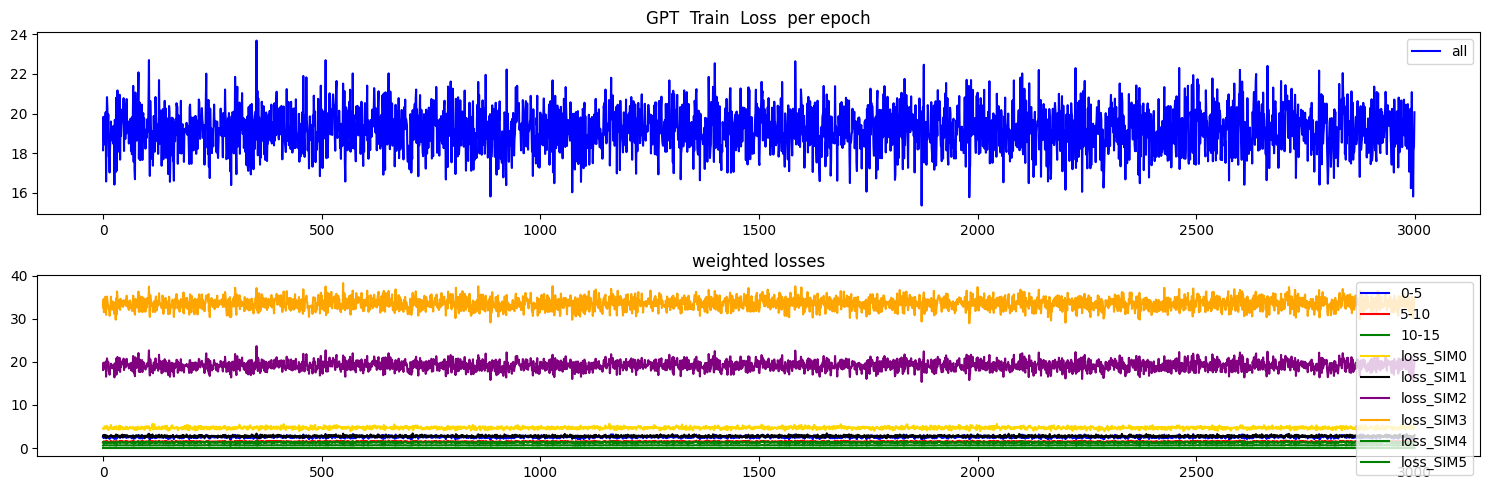

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.039773907512426376
Test MSE Loss - SI only 0-5:  0.03719591349363327
Test MSE Loss - SI only 5-10:  0.009081789292395115
Test MSE Loss - SI only 10-15:  0.028454652056097984
mae, mse, rmse, mape, mspe, rse, corr
(0.16497482, 0.039773904, 0.19943395, 33.580765, 33477.08, 1.1833675)
Testing R**2 - SI only:  -0.4003585300273431
Testing R**2 - SI only:  -0.4003585300273431
Testing R**2 - All features:  0.9911634053768585
Testing R**2 - (f2) - SI full:  -0.48496235064332605


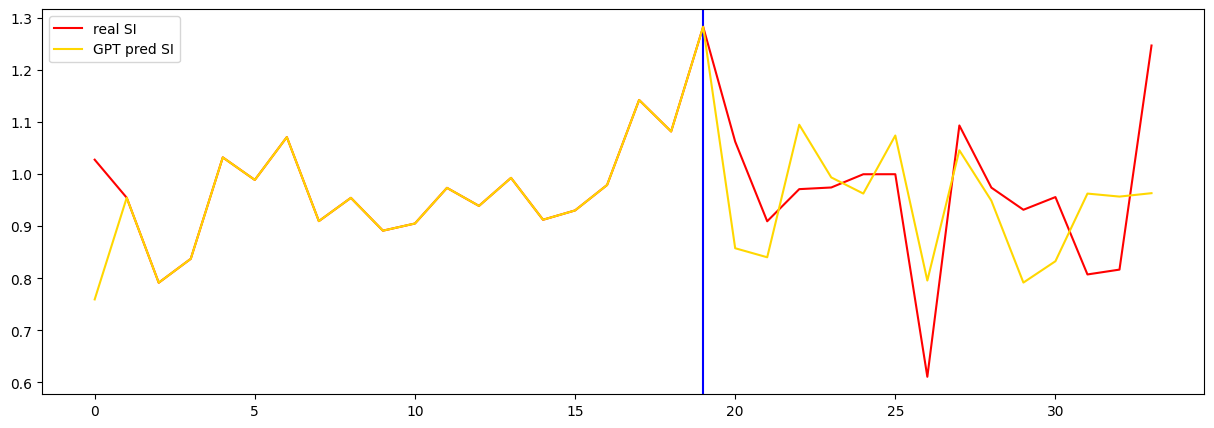

In [10]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  13.106276512145996
seq length of pred =  30
500 train loss =  13.914876937866211
seq length of pred =  30
1000 train loss =  13.089624404907227
seq length of pred =  30
1500 train loss =  12.871790885925293
seq length of pred =  30
2000 train loss =  14.062371253967285
seq length of pred =  30
2500 train loss =  14.01690673828125
seq length of pred =  30


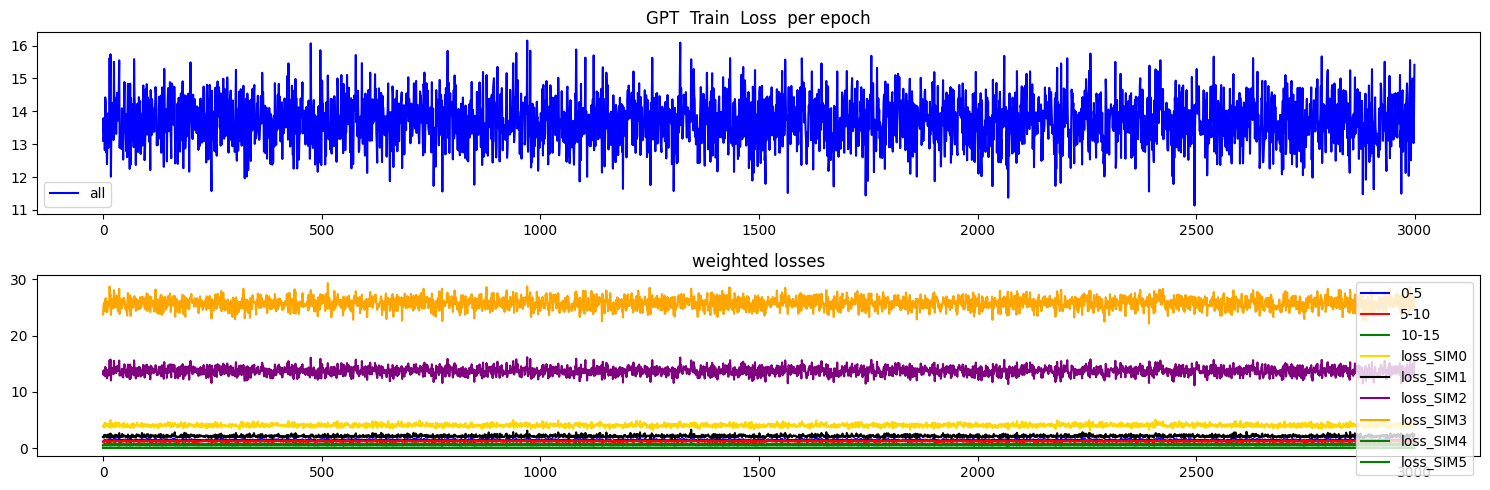

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.055795375257730484
Test MSE Loss - SI only 0-5:  0.03719591349363327
Test MSE Loss - SI only 5-10:  0.009081789292395115
Test MSE Loss - SI only 10-15:  0.028454652056097984
mae, mse, rmse, mape, mspe, rse, corr
(0.18441366, 0.055795375, 0.23621045, 53.654232, 86968.75, 1.4015855)
Testing R**2 - SI only:  -0.9644419134645832
Testing R**2 - SI only:  -0.9644419134645832
Testing R**2 - All features:  0.9860617730189255
Testing R**2 - (f2) - SI full:  -0.9709092126695713


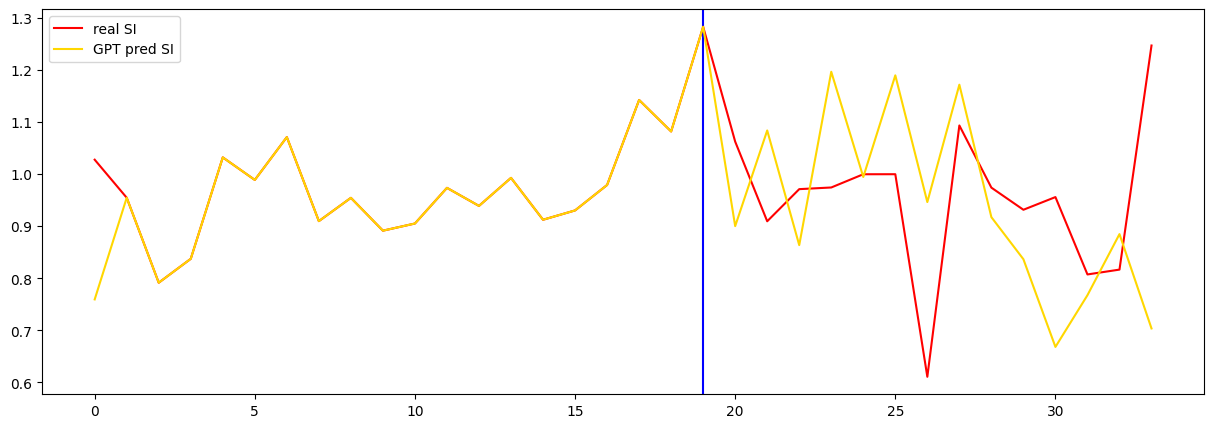

In [11]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  14.372370719909668
seq length of pred =  30
500 train loss =  15.841198921203613
seq length of pred =  30
1000 train loss =  14.194026947021484
seq length of pred =  30
1500 train loss =  15.041926383972168
seq length of pred =  30
2000 train loss =  14.698973655700684
seq length of pred =  30
2500 train loss =  14.639399528503418
seq length of pred =  30


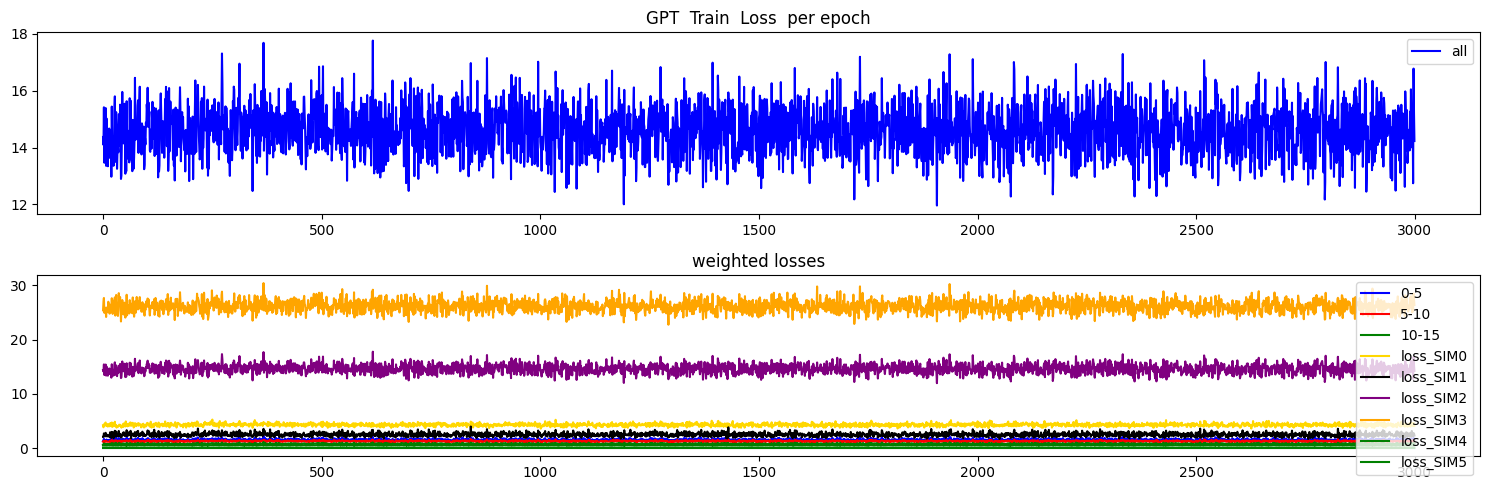

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.05633450672030449
Test MSE Loss - SI only 0-5:  0.03719591349363327
Test MSE Loss - SI only 5-10:  0.00908179022371769
Test MSE Loss - SI only 10-15:  0.028454652056097984
mae, mse, rmse, mape, mspe, rse, corr
(0.1870468, 0.05633451, 0.23734891, 19.211014, 7519.087, 1.4083408)
Testing R**2 - SI only:  -0.9834236868573925
Testing R**2 - SI only:  -0.9834236868573925
Testing R**2 - All features:  0.9926460000307964
Testing R**2 - (f2) - SI full:  -0.4802393299462644


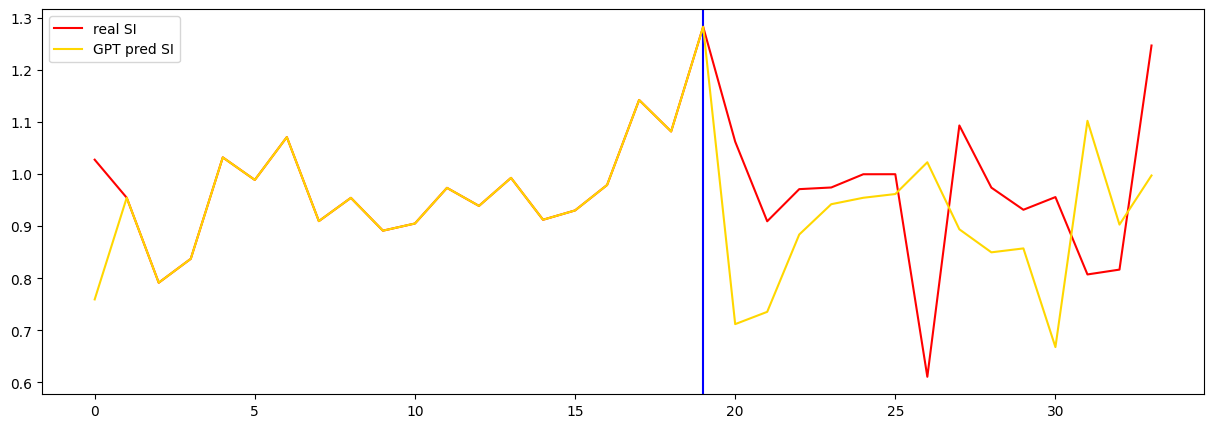

In [12]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  14.19169807434082
seq length of pred =  30
500 train loss =  12.792264938354492
seq length of pred =  30
1000 train loss =  13.667398452758789
seq length of pred =  30
1500 train loss =  12.880358695983887
seq length of pred =  30
2000 train loss =  12.253140449523926
seq length of pred =  30
2500 train loss =  13.300577163696289
seq length of pred =  30


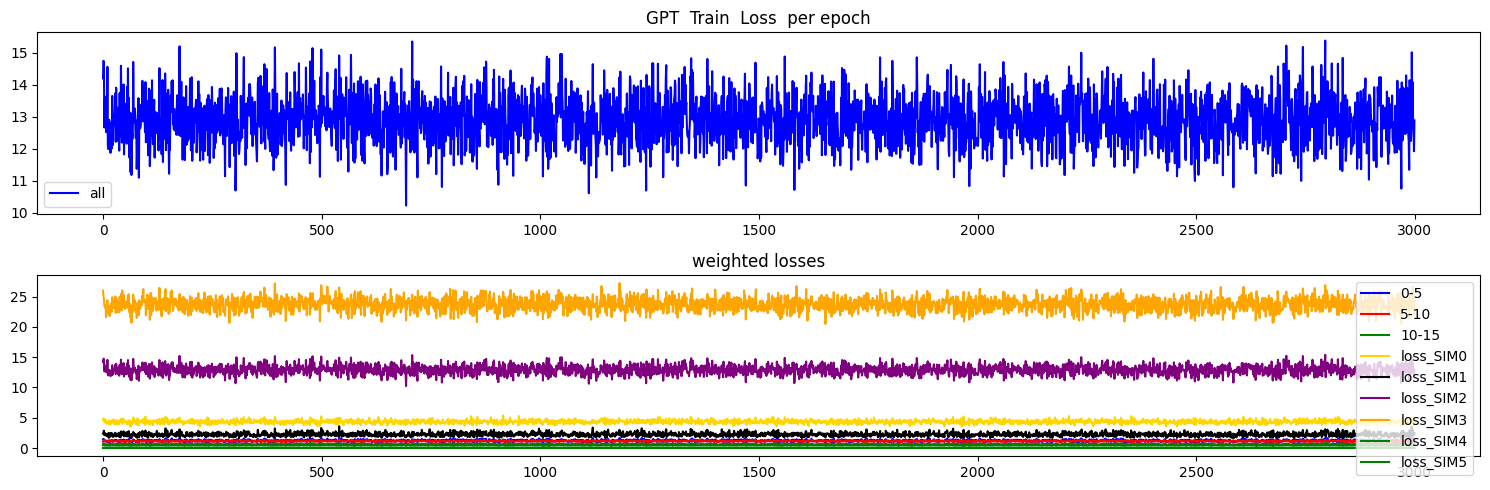

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.05477527529001236
Test MSE Loss - SI only 0-5:  0.03719591349363327
Test MSE Loss - SI only 5-10:  0.009081789292395115
Test MSE Loss - SI only 10-15:  0.028454652056097984
mae, mse, rmse, mape, mspe, rse, corr
(0.19271372, 0.05477527, 0.23404117, 81.64106, 212512.66, 1.3887138)
Testing R**2 - SI only:  -0.928526308041804
Testing R**2 - SI only:  -0.928526308041804
Testing R**2 - All features:  0.9766450556171645
Testing R**2 - (f2) - SI full:  -0.35624202213994227


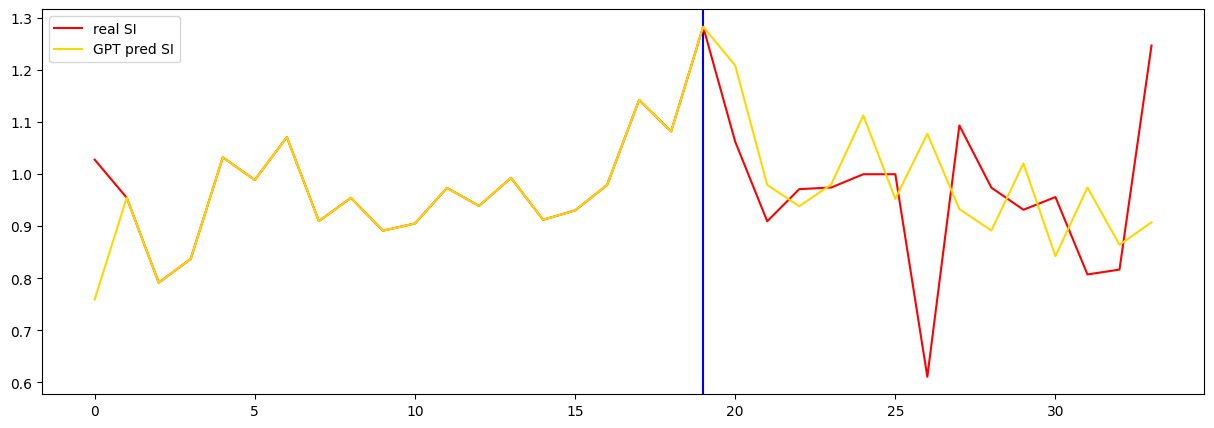

In [13]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Train on Train, Test on Train



## 000 to 015


0 train loss =  15.42410659790039
seq length of pred =  30
500 train loss =  14.491989135742188
seq length of pred =  30
1000 train loss =  14.851600646972656
seq length of pred =  30
1500 train loss =  15.150310516357422
seq length of pred =  30
2000 train loss =  14.73470687866211
seq length of pred =  30
2500 train loss =  15.26091194152832
seq length of pred =  30


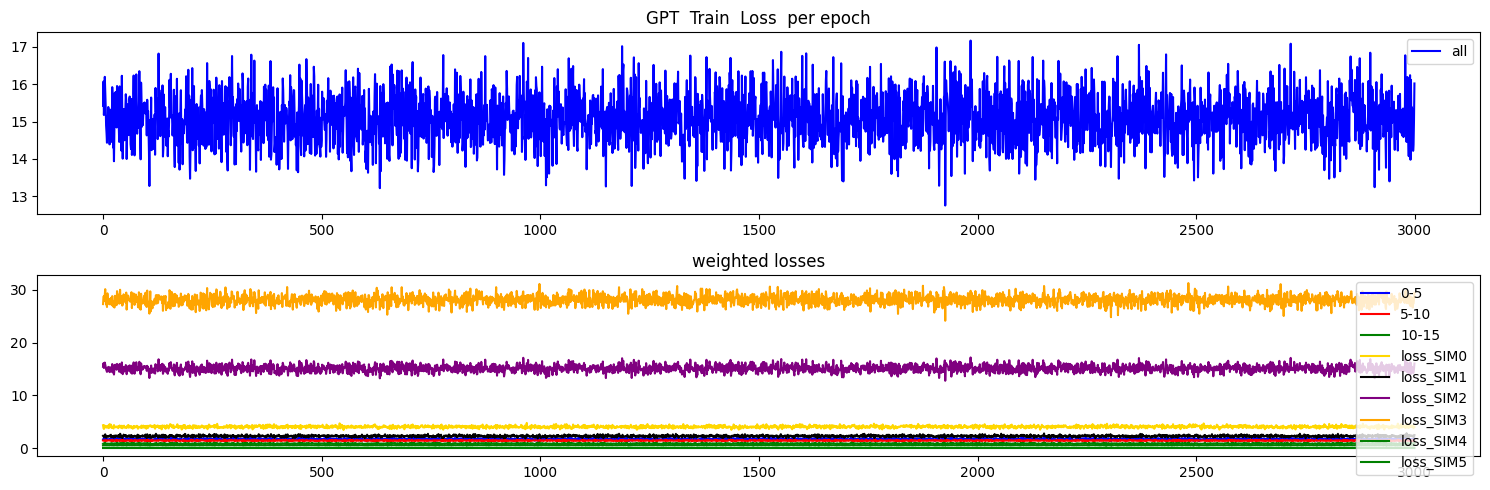

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.058058977127075195
Test MSE Loss - SI only 0-5:  0.04206138104200363
Test MSE Loss - SI only 5-10:  0.07633031159639359
Test MSE Loss - SI only 10-15:  0.05545998364686966
mae, mse, rmse, mape, mspe, rse, corr
(0.1808809, 0.05805898, 0.24095431, 11.156906, 2929.6895, 1.2160841)
Testing R**2 - SI only:  -0.47886038163094735
Testing R**2 - SI only:  -0.47886038163094735
Testing R**2 - All features:  0.9749229835633192
Testing R**2 - (f2) - SI full:  -0.16683938262889209


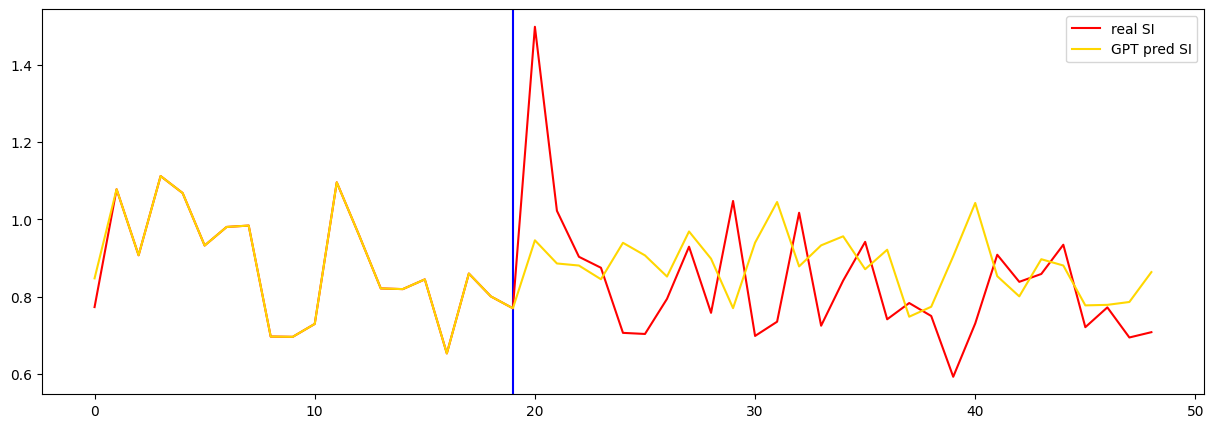

In [14]:

inferenceGPT_obj.the_offset = 0
train_CIVS, test_CIVS                                    = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  train_CIVS  ) 
results_string  = inferenceGPT_obj.function_test_rc( train_CIVS, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 015 to 030


0 train loss =  13.43751049041748
seq length of pred =  30
500 train loss =  12.455129623413086
seq length of pred =  30
1000 train loss =  13.445883750915527
seq length of pred =  30
1500 train loss =  12.911698341369629
seq length of pred =  30
2000 train loss =  12.14547061920166
seq length of pred =  30
2500 train loss =  13.342808723449707
seq length of pred =  30


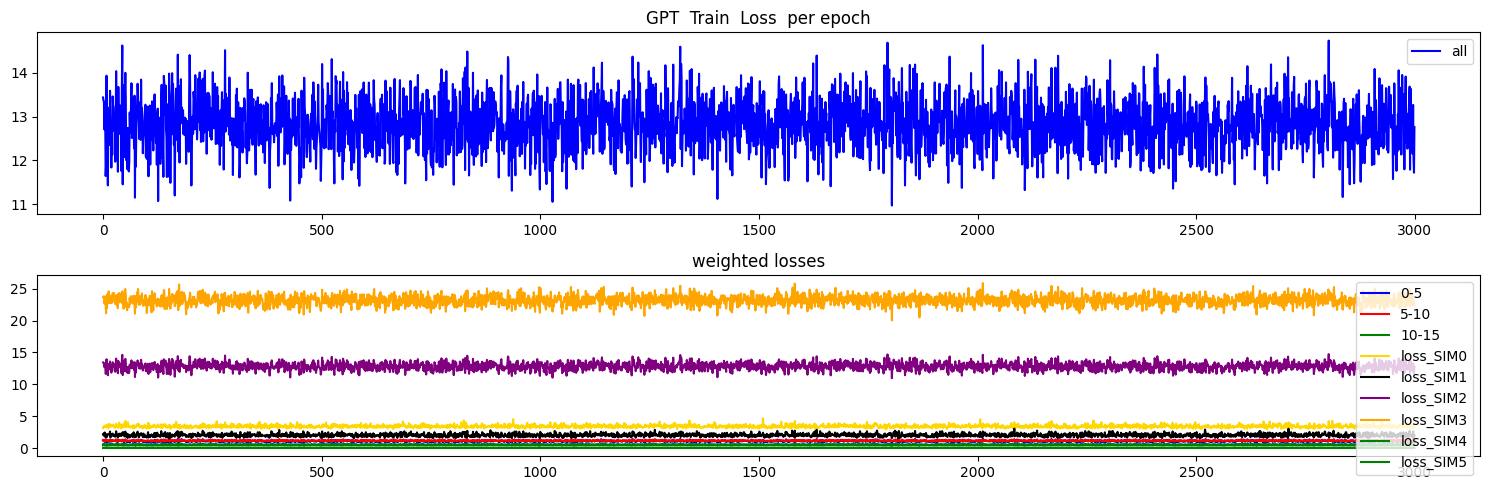

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.11816193163394928
Test MSE Loss - SI only 0-5:  0.4357689917087555
Test MSE Loss - SI only 5-10:  0.06865420937538147
Test MSE Loss - SI only 10-15:  0.22242562472820282
mae, mse, rmse, mape, mspe, rse, corr
(0.2546466, 0.118161924, 0.3437469, 3.690842, 85.53673, 1.6594374)
Testing R**2 - SI only:  -1.753732933754033
Testing R**2 - SI only:  -1.753732933754033
Testing R**2 - All features:  0.9730035031176671
Testing R**2 - (f2) - SI full:  -1.4685977340644607


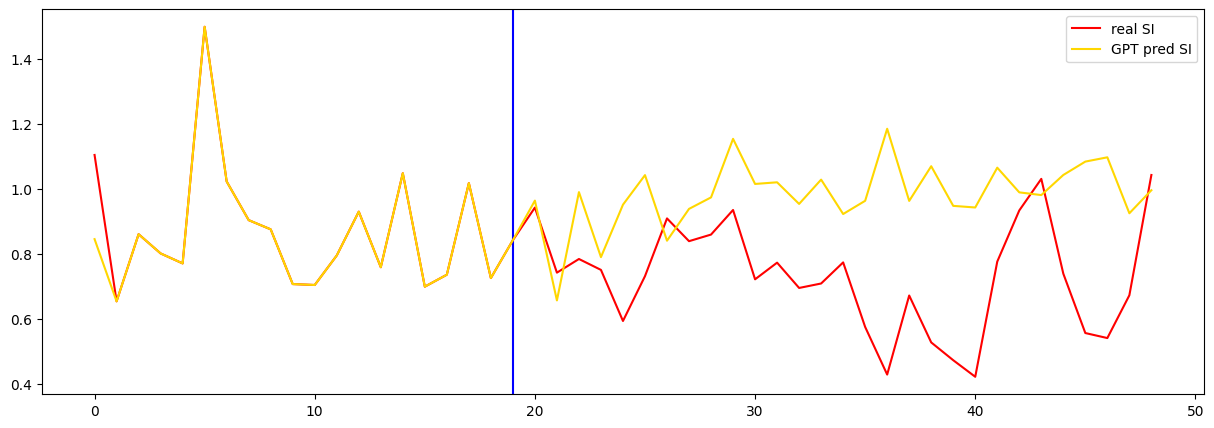

In [15]:

inferenceGPT_obj.the_offset = 15
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 030 to 045


0 train loss =  12.546216011047363
seq length of pred =  30
500 train loss =  12.403059005737305
seq length of pred =  30
1000 train loss =  9.908699035644531
seq length of pred =  30
1500 train loss =  13.082084655761719
seq length of pred =  30
2000 train loss =  11.306167602539062
seq length of pred =  30
2500 train loss =  11.50763988494873
seq length of pred =  30


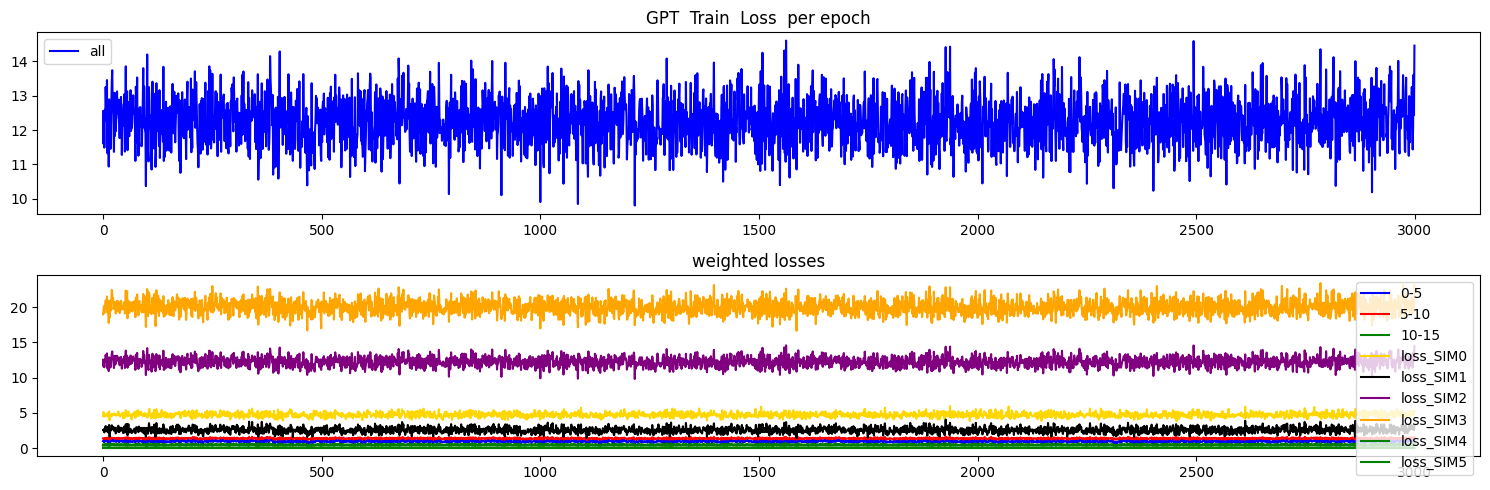

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.05348529294133186
Test MSE Loss - SI only 0-5:  0.0340297557413578
Test MSE Loss - SI only 5-10:  0.03222682327032089
Test MSE Loss - SI only 10-15:  0.036190666258335114
mae, mse, rmse, mape, mspe, rse, corr
(0.18810298, 0.0534853, 0.2312689, 3.8165152, 140.39243, 1.3322377)
Testing R**2 - SI only:  -0.7748570036706033
Testing R**2 - SI only:  -0.7748570036706033
Testing R**2 - All features:  0.9234204180311278
Testing R**2 - (f2) - SI full:  -0.1094749409667386


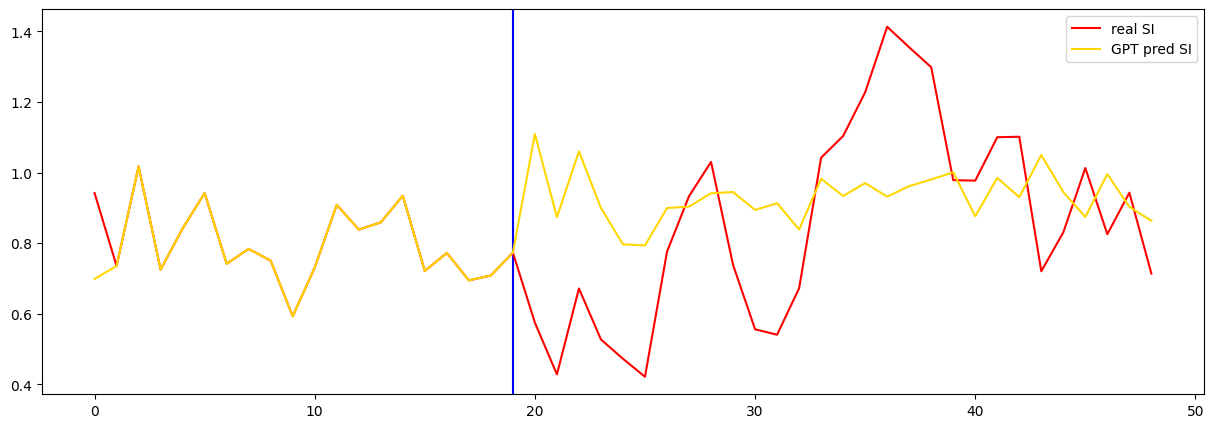

In [16]:

inferenceGPT_obj.the_offset = 30
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 045 to 060


0 train loss =  11.127309799194336
seq length of pred =  30
500 train loss =  11.204597473144531
seq length of pred =  30
1000 train loss =  11.480559349060059
seq length of pred =  30
1500 train loss =  10.358765602111816
seq length of pred =  30
2000 train loss =  11.006775856018066
seq length of pred =  30
2500 train loss =  10.896330833435059
seq length of pred =  30


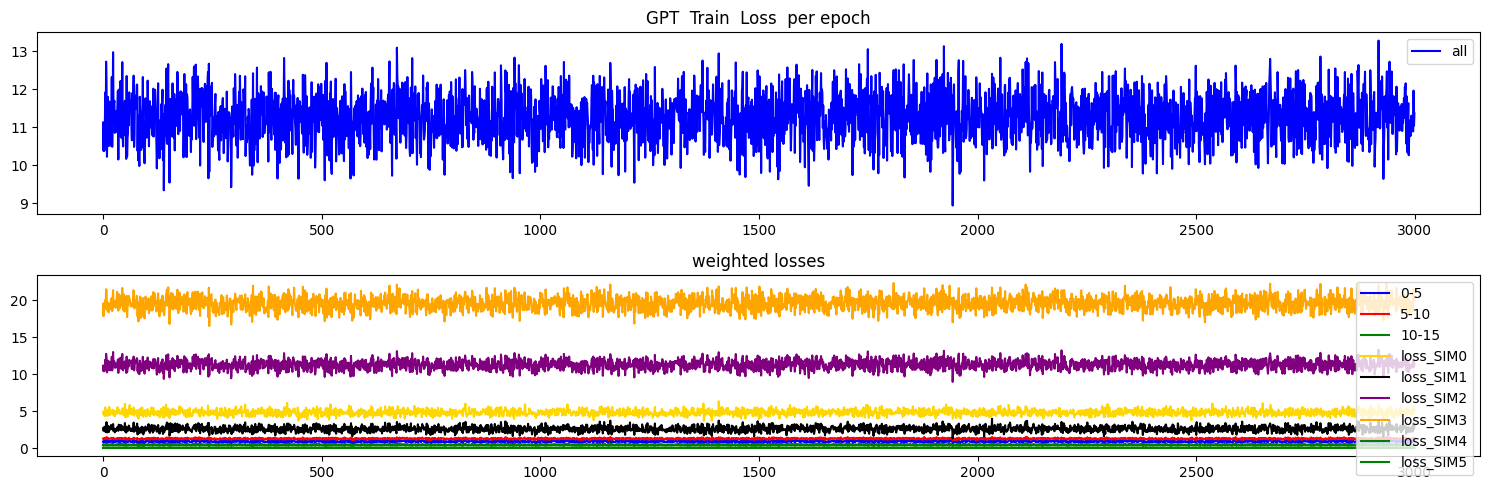

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.037949200719594955
Test MSE Loss - SI only 0-5:  0.07638398557901382
Test MSE Loss - SI only 5-10:  0.07152655720710754
Test MSE Loss - SI only 10-15:  0.042657870799303055
mae, mse, rmse, mape, mspe, rse, corr
(0.16134544, 0.037949197, 0.19480553, 7.142374, 895.5951, 1.138554)
Testing R**2 - SI only:  -0.2963053071929831
Testing R**2 - SI only:  -0.2963053071929831
Testing R**2 - All features:  0.9422927283560669
Testing R**2 - (f2) - SI full:  0.08654482906589434


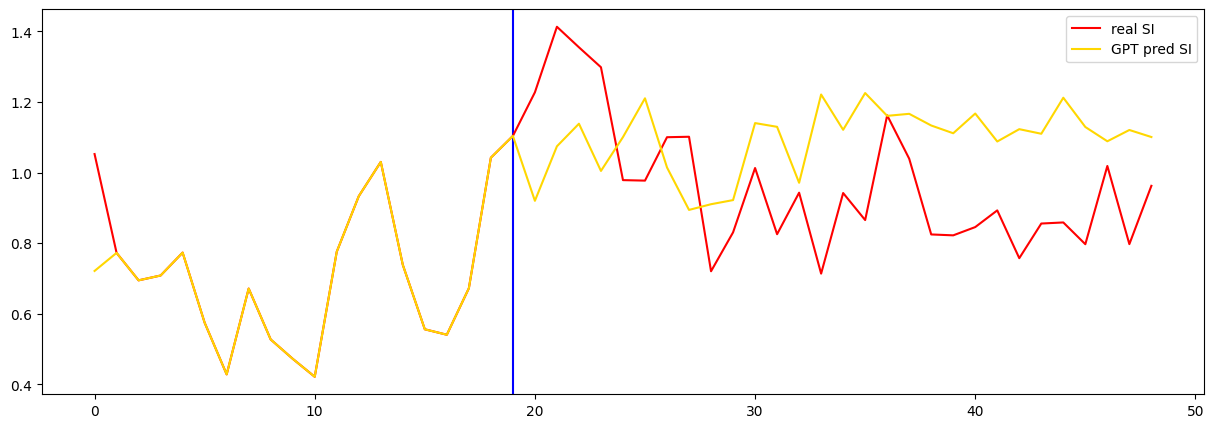

In [17]:

inferenceGPT_obj.the_offset = 45
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 060 to 075


0 train loss =  14.684074401855469
seq length of pred =  30
500 train loss =  13.87020492553711
seq length of pred =  30
1000 train loss =  14.228459358215332
seq length of pred =  30
1500 train loss =  13.618815422058105
seq length of pred =  30
2000 train loss =  13.940936088562012
seq length of pred =  30
2500 train loss =  14.864171981811523
seq length of pred =  30


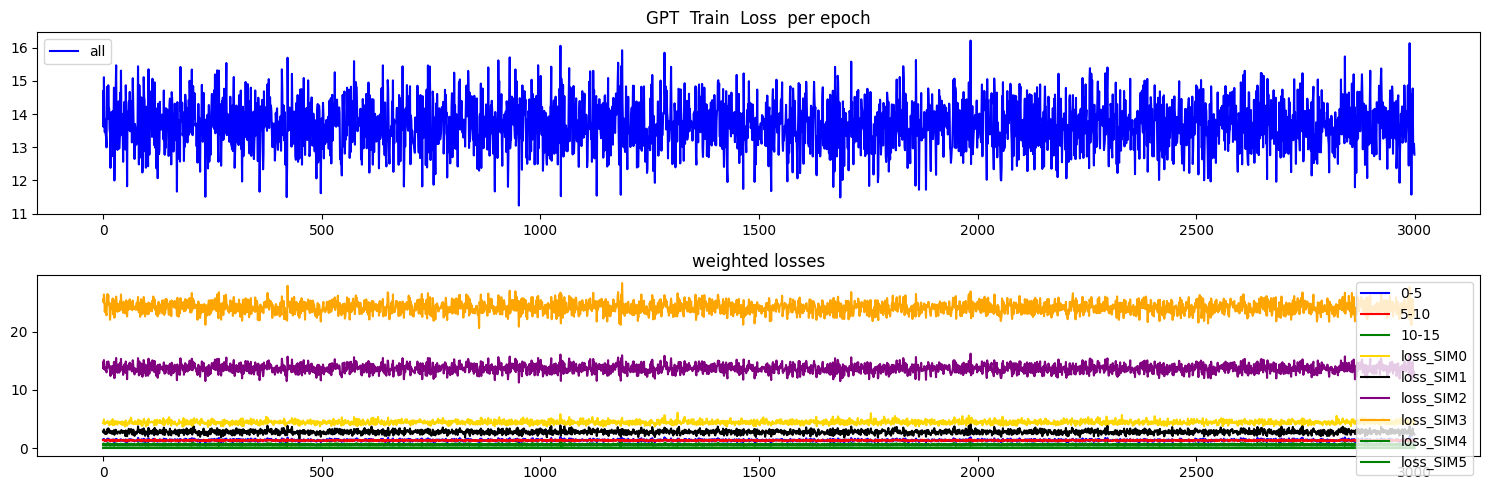

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.05092465505003929
Test MSE Loss - SI only 0-5:  0.027284791693091393
Test MSE Loss - SI only 5-10:  0.10380108654499054
Test MSE Loss - SI only 10-15:  0.11293947696685791
mae, mse, rmse, mape, mspe, rse, corr
(0.18500978, 0.05092465, 0.22566491, 9.519362, 1252.0272, 1.331891)
Testing R**2 - SI only:  -0.7739334482630575
Testing R**2 - SI only:  -0.7739334482630575
Testing R**2 - All features:  0.9582103583213682
Testing R**2 - (f2) - SI full:  -0.017715450560625623


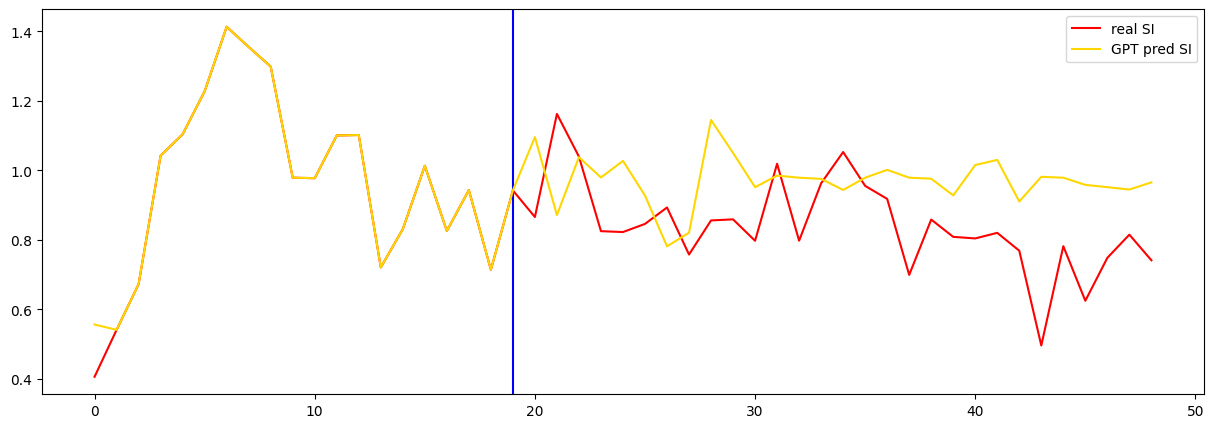

In [18]:

inferenceGPT_obj.the_offset = 60
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 075 to 090


0 train loss =  14.474776268005371
seq length of pred =  30
500 train loss =  14.11125373840332
seq length of pred =  30
1000 train loss =  12.977191925048828
seq length of pred =  30
1500 train loss =  13.773100852966309
seq length of pred =  30
2000 train loss =  14.584216117858887
seq length of pred =  30
2500 train loss =  13.158041954040527
seq length of pred =  30


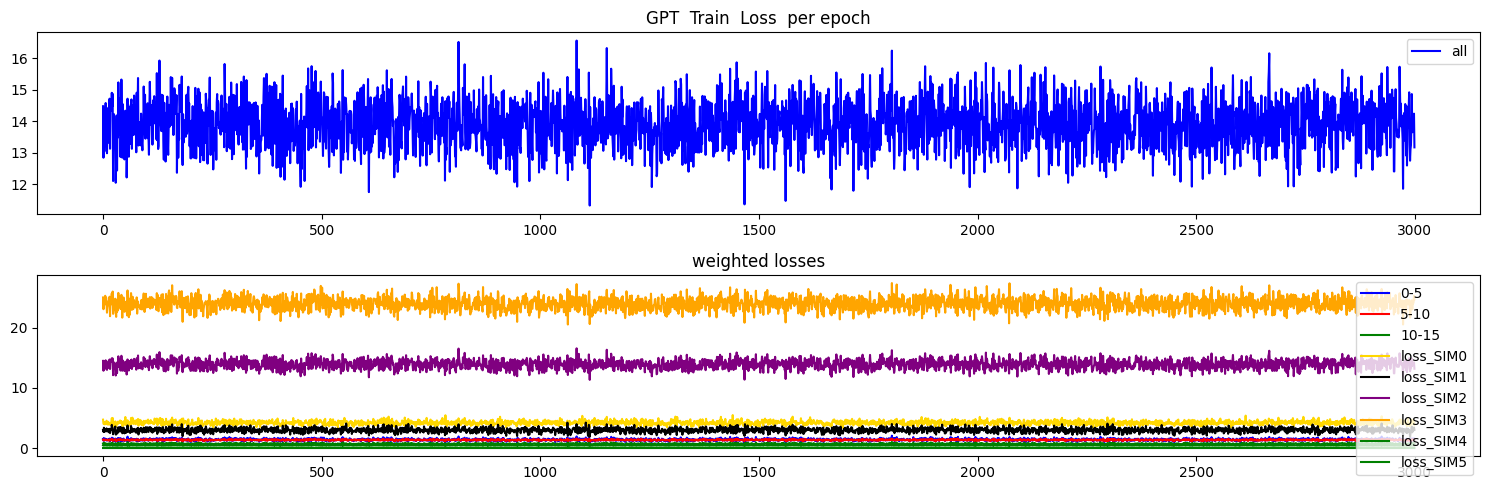

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.11527728289365768
Test MSE Loss - SI only 0-5:  0.09235256165266037
Test MSE Loss - SI only 5-10:  0.01964373141527176
Test MSE Loss - SI only 10-15:  0.08715896308422089
mae, mse, rmse, mape, mspe, rse, corr
(0.24995773, 0.11527727, 0.33952507, 4.868908, 200.94244, 1.1838065)
Testing R**2 - SI only:  -0.40139832181095025
Testing R**2 - SI only:  -0.40139832181095025
Testing R**2 - All features:  0.8470986384222103
Testing R**2 - (f2) - SI full:  -0.4735993559718319


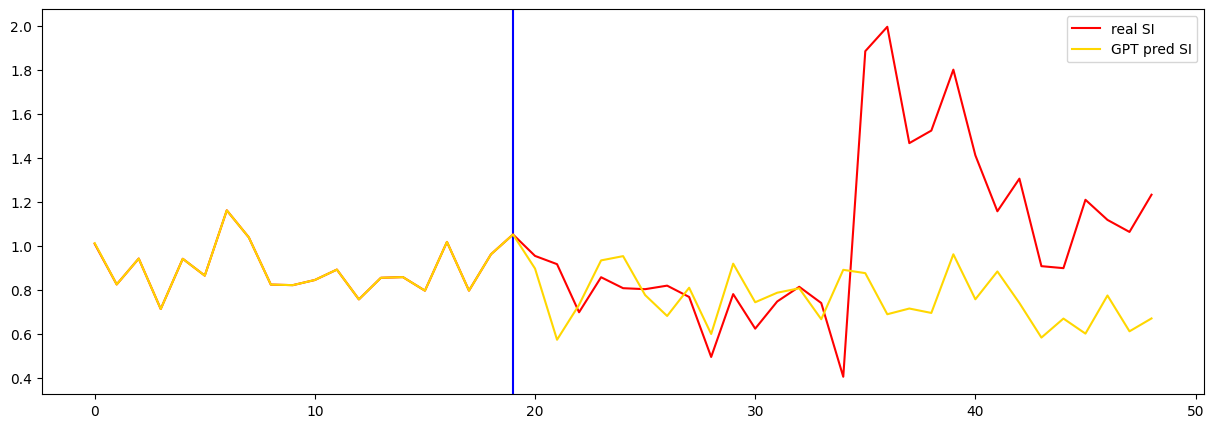

In [19]:

inferenceGPT_obj.the_offset = 75
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 090 to 105


0 train loss =  13.221427917480469
seq length of pred =  30
500 train loss =  14.23019790649414
seq length of pred =  30
1000 train loss =  12.632730484008789
seq length of pred =  30
1500 train loss =  15.871611595153809
seq length of pred =  30
2000 train loss =  15.236270904541016
seq length of pred =  30
2500 train loss =  13.994925498962402
seq length of pred =  30


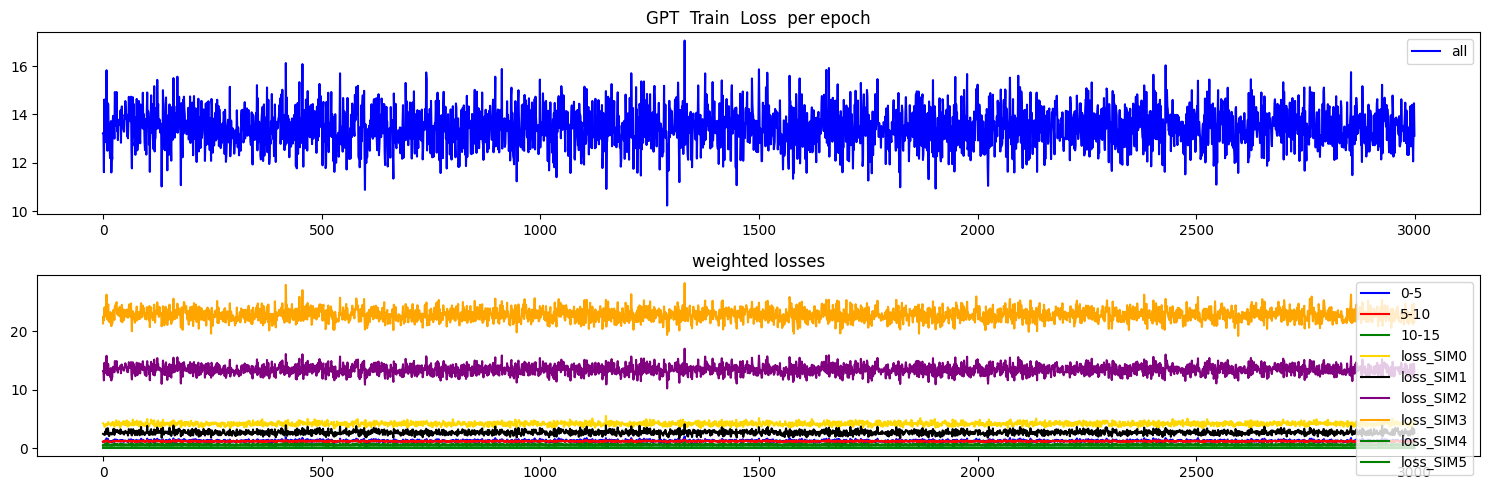

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.1365693062543869
Test MSE Loss - SI only 0-5:  0.0516434982419014
Test MSE Loss - SI only 5-10:  0.07359741628170013
Test MSE Loss - SI only 10-15:  0.073246531188488
mae, mse, rmse, mape, mspe, rse, corr
(0.25820976, 0.1365693, 0.36955285, 2.9196908, 20.971548, 1.2697848)
Testing R**2 - SI only:  -0.6123532746479496
Testing R**2 - SI only:  -0.6123532746479496
Testing R**2 - All features:  0.8755141616598663
Testing R**2 - (f2) - SI full:  -0.4445482178980875


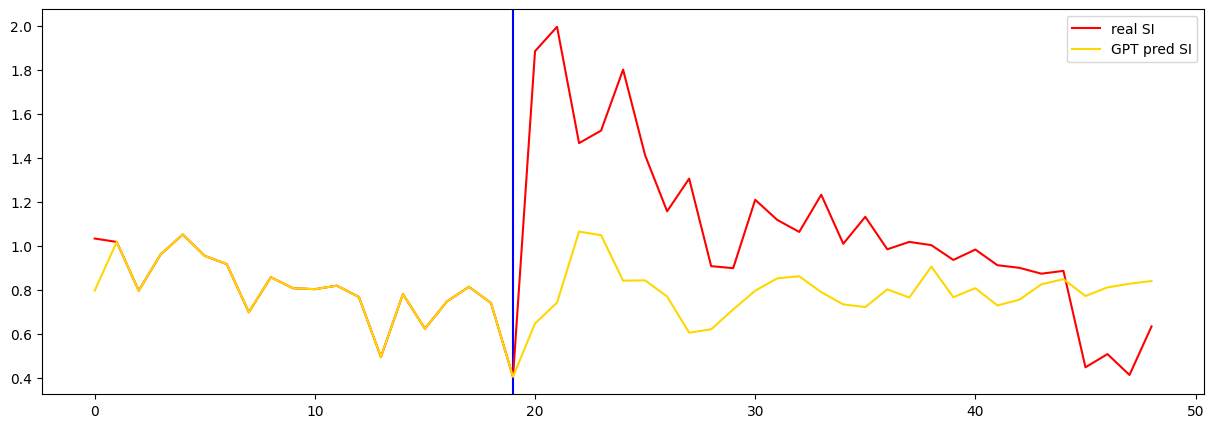

In [20]:

inferenceGPT_obj.the_offset = 90
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## Save excel to csv


In [21]:
 
inferenceGPT_obj.save_Excel_to_CSV()



## Add the dates ( ??) 


In [22]:

tsDataWrangling_obj.add_dates_after_GPT_is_trained( tsGPT_obj )
